In [1]:
# Creating data set - predicting A B or C

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


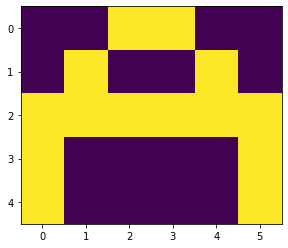

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [5]:

# converting data and labels into numpy array
 
"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""
 
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]
 
 
# Labels are also converted into NumPy array
y = np.array(y)
 
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [6]:
# Defining layers of the NN
# 1st layer: Input layer(1, 30)
# 2nd layer: Hidden layer (1, 5)
# 3rd layer: Output layer(3, 3)

In [7]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1 # dot product of matrix and vector 
	a1 = sigmoid(z1)# out put of layer 2 # changed to activation function
	
	# Output layer 
	z2 = a1.dot(w2)# input of out layer 
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly # for SGD
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1) #transposed and multiplied by error
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters/weights
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()

In [8]:
# NN has 3 layers - 2 weight matrix associated with it - size of matrix depends on number of nodes
# randomly initializes weights for gradient descent 
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-0.53822694  0.56020836 -1.32771759  2.3954723  -1.25794926]
 [ 0.02479903  0.46436653  0.32769362 -1.62516767 -0.26312782]
 [-1.34042774 -1.11479907  0.30430489 -0.67589765 -1.24218437]
 [-1.86418918  1.28551045 -0.98752695  0.10493718  2.20753523]
 [ 0.12374136 -0.41673754  0.67059712 -0.3819703   1.40188002]
 [-0.37936581 -1.03383236  0.13833757  1.78234705 -0.20883056]
 [-1.71596855 -2.17674456  0.98464106  0.40761507 -0.89851175]
 [ 0.62791335  1.39458418 -0.38284771 -0.95576056 -0.41609489]
 [ 2.03352443  0.49999298 -0.12395003 -0.70365076  0.06236684]
 [-1.53273696 -0.34270935 -0.85284101  0.51179142  0.22023449]
 [-0.53180477  2.36536377 -0.46345081  0.5594623   0.00884039]
 [-0.07171503 -0.6894269   0.36316686 -1.60458802 -0.18102409]
 [ 1.11953215 -0.45922169 -2.20598665  0.52870933  0.11898127]
 [-0.46423511 -0.6826584  -0.81509102  1.30432516  1.53986827]
 [-1.08553974  0.68735886 -0.09644155  0.52771723  0.36262703]
 [ 0.03942207 -0.49016535 -0.227697   -0.12972683  0.37

In [9]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""
 
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 76.45567546232391
epochs: 2 ======== acc: 77.86765276638428
epochs: 3 ======== acc: 78.92947254633789
epochs: 4 ======== acc: 79.76171456698802
epochs: 5 ======== acc: 80.44324845941229
epochs: 6 ======== acc: 81.02329758904828
epochs: 7 ======== acc: 81.53236220391547
epochs: 8 ======== acc: 81.9896669089913
epochs: 9 ======== acc: 82.40774293194532
epochs: 10 ======== acc: 82.79512285390163
epochs: 11 ======== acc: 83.15789109012793
epochs: 12 ======== acc: 83.50057010370942
epochs: 13 ======== acc: 83.82663247384312
epochs: 14 ======== acc: 84.13880664270555
epochs: 15 ======== acc: 84.43926967428303
epochs: 16 ======== acc: 84.72977715045089
epochs: 17 ======== acc: 85.01175647279547
epochs: 18 ======== acc: 85.28637726664508
epochs: 19 ======== acc: 85.55460620831713
epochs: 20 ======== acc: 85.81725043544472
epochs: 21 ======== acc: 86.07499212378164
epochs: 22 ======== acc: 86.32841598606575
epochs: 23 ======== acc: 86.57803096352824
epochs: 24 ======== a

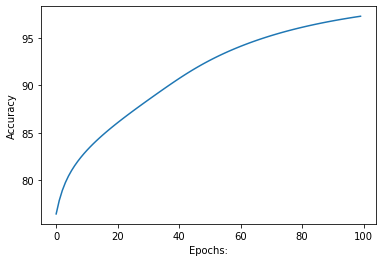

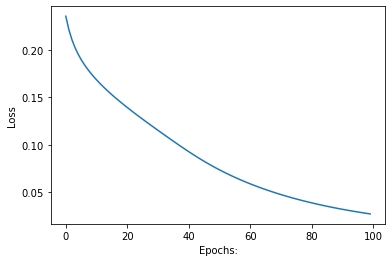

In [10]:
# plots lsos and accuracy for each iteration
import matplotlib.pyplot as plt1
 
# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
 
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [11]:
# trained weights
print(w1, "\n", w2)

[[-0.53822694  0.56020836 -1.32771759  2.3954723  -1.25794926]
 [-0.02200216  0.16722293  0.04512549 -1.40845459 -0.22709056]
 [-1.37339293 -1.29893705  0.52476928 -1.01279641 -1.23895012]
 [-1.89715437  1.10137247 -0.76706257 -0.23196158  2.21076947]
 [ 0.07694017 -0.71388114  0.388029   -0.16525722  1.43791728]
 [-0.37936581 -1.03383236  0.13833757  1.78234705 -0.20883056]
 [-1.71596855 -2.17674456  0.98464106  0.40761507 -0.89851175]
 [ 0.59494816  1.2104462  -0.16238332 -1.29265933 -0.41286064]
 [ 2.03352443  0.49999298 -0.12395003 -0.70365076  0.06236684]
 [-1.53273696 -0.34270935 -0.85284101  0.51179142  0.22023449]
 [-0.51471437  2.65845633 -0.27014396  0.73968866 -0.06697394]
 [-0.07171503 -0.6894269   0.36316686 -1.60458802 -0.18102409]
 [ 1.13336815 -0.34621607 -1.70295414 -0.02490252  0.08617825]
 [-0.49720029 -0.86679637 -0.59462663  0.9674264   1.54310252]
 [-1.06844934  0.98045142  0.09686531  0.70794359  0.28681269]
 [ 0.05651247 -0.19707278 -0.03439015  0.05049952  0.30

Image is of letter B.


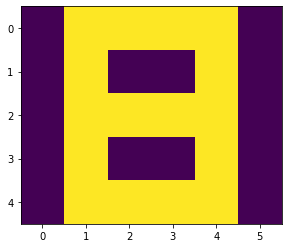

In [12]:
# can then make predictions
predict(x[1], w1, w2)